In [1]:
import sys
# Para trabajar local
sys.path.append('C:/Users/raul/Documents/Data Science Proyectos/Machine_Learning_ampliado/machine_learning_practico-clase-3/machine_learning_practico-clase-3/lib')

## Cargamos los datos

In [11]:
from pathlib import Path

In [12]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np

In [13]:
PATH = Path('C:/Users/raul/Documents/Data Science Proyectos/Datos')


In [14]:
PATH

WindowsPath('C:/Users/raul/Documents/Data Science Proyectos/Datos')

In [15]:
#movies = pd.read_csv(PATH / 'AllMoviesDetailsCleaned.csv', sep=';', error_bad_lines=False)

In [16]:
movies = pd.read_csv(PATH / 'allmovies.csv', sep=';',encoding='latin-1')

C:\Users\raul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
movies.head()

,ï..id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,popularity_2,scientific
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,Released,NaN,Ariel,7.100,40,2,1,2,0.824,False
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,Released,NaN,Shadows in Paradise,7.000,32,1,1,3,0.474,False
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.500,485,2,1,1,1.698,False
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.500,69,3,2,1,1.323,False
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.400,4,1,1,5,0.055,False


In [18]:
movies[['production_companies_number']]

,production_companies_number
0,2
1,1
2,2
3,3
4,1
...,...
329039,1
329040,1
329041,0
329042,0


In [19]:
a = movies #guardo el dataframe

In [20]:
movies.count()

ï..id                          329044
budget                         329044
genres                         207515
imdb_id                        250564
original_language              328841
original_title                 329043
overview                       278060
popularity                     329044
production_companies           329044
production_countries           329044
release_date                   304998
revenue                        329044
runtime                        292252
spoken_languages               324584
status                         327056
tagline                         52931
title                          329043
vote_average                   329044
vote_count                     329044
production_companies_number    329044
production_countries_number    329044
spoken_languages_number        329044
popularity_2                   317118
scientific                     329044
dtype: int64

24 Variables

In [21]:
lista_categoricas = ['genres','original_language','original_title','overview','production_companies','production_countries','spoken_languages','status','tagline','title','production_companies_number','production_countries_number','spoken_languages_number']  
lista_numerica = ['ï..id','imdb_id','popularity','release_date','revenue','runtime','vote_average','vote_count','popularity_2']

In [22]:
for i in lista_categoricas:
    print(movies[i].value_counts())

Drama                                       30190
Documentary                                 25532
Comedy                                      22568
Music                                        8030
Animation                                    6341
                                            ...  
TV Movie|Action|Drama|Family                    1
Family|Action|Adventure|Comedy|Animation        1
Comedy|Drama|Romance|Family                     1
Comedy|Fantasy|War                              1
Crime|Thriller|Western|Action                   1
Name: genres, Length: 7619, dtype: int64
en    216831
de     20465
fr     14734
es     12004
ja      8393
       ...  
aa         1
ty         1
ie         1
hz         1
sg         1
Name: original_language, Length: 134, dtype: int64
Carmen                              38
Macbeth                             25
Solo                                20
Home                                20
Blackout                            20
                    

## Inspección inicial de los datos. 

In [23]:
movies.dtypes

ï..id                            int64
budget                           int64
genres                          object
imdb_id                         object
original_language               object
original_title                  object
overview                        object
popularity                      object
production_companies            object
production_countries            object
release_date                    object
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
production_companies_number      int64
production_countries_number      int64
spoken_languages_number          int64
popularity_2                   float64
scientific                        bool
dtype: object

In [24]:
movies.isnull().sum()

ï..id                               0
budget                              0
genres                         121529
imdb_id                         78480
original_language                 203
original_title                      1
overview                        50984
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276113
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
popularity_2                    11926
scientific                          0
dtype: int64

In [25]:
# Me llama la atención la cantidad de generos no especificados. 
generos_no_especificados = movies[movies['genres'].isnull()]

### Detalle de algunas variables

In [26]:
#Revisador de variable
movies['original_language'].value_counts()
movies['status'].value_counts()

Released           322567
Post Production      1446
Rumored              1232
In Production         953
Planned               745
Canceled              113
Name: status, dtype: int64

# Un Breve Resumen de los procedimientos a realizar. 

## Primer abordaje

Dejar el dataset sin valores nulos buscando la mejor imputación de valores posible. 

Analicemos UNICAMENTE LAS 'OBJECTS' RELEVANTES: https://pbpython.com/categorical-encoding.html

En muchos datasets habra variables CATEGORICAS. Estas son tipicamente almacenadas como texto. El lenguage original de la pelicula o algunas numericas 'accidentales', como el caso de 'popularity', que por contener notaciòn cientifica se encuentra en type object. El desafio es determinar como usar la data en el analysis, ver como transformar estos atributos de texto en valores numericos para el procesamiento futura (ONE HOT ENCODING).

No hay una respuesta unica al abordaje de este tipo de desafios. Cada uno tiene trade-offs y tendra implicancias futuras en el resultado del analisis. Afortunadamente, las herramientas de python/pandas y scikit-learn tienen abordajes que pueden ser aplicados para transformar las variables categoricas en adecuadas variables numéricas. 

Antes de comenzar a codificar los distintos valores hacer algunas limpiezas menores. Afortunadamente, pandas hace que esto sea sencillo:

In [27]:
obj_movies = movies.select_dtypes(include=['object']).copy()
obj_movies.head()

,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,21/10/1988,suomi,Released,NaN,Ariel
1,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,16/10/1986,English,Released,NaN,Shadows in Paradise
2,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,25/12/1995,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms
3,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,15/10/1993,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night
4,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,01/01/2006,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX)


In [28]:
obj_movies.isnull().sum()

genres                  121529
imdb_id                  78480
original_language          203
original_title               1
overview                 50984
popularity                   0
production_companies         0
production_countries         0
release_date             24046
spoken_languages          4460
status                    1988
tagline                 276113
title                        1
dtype: int64

In [29]:
obj_movies.dtypes

genres                  object
imdb_id                 object
original_language       object
original_title          object
overview                object
popularity              object
production_companies    object
production_countries    object
release_date            object
spoken_languages        object
status                  object
tagline                 object
title                   object
dtype: object

#### imdb_id

In [30]:
movies = movies.fillna({"imdb_id": 0})

#### original_title

In [31]:
movies = movies.fillna({"original_title": "Sin dato"})

#### overview

In [32]:
movies = movies.fillna({"overview": "Sin overview"})

#### Lenguajes : original y spoken

In [33]:
movies['original_language'].unique()

array(['fi', 'en', 'de', 'ja', 'es', 'zh', 'fr', 'da', 'ko', 'pl', 'sv',
       'it', 'bs', 'pt', 'hi', 'ru', 'no', 'nl', 'cs', 'bn', 'cn', 'af',
       'sr', 'mn', 'et', 'el', 'is', 'ro', 'fa', 'th', 'he', 'tr', 'bg',
       'ab', 'zu', 'ar', 'hu', 'hr', 'ta', 'am', 'lt', 'nb', 'xx', 'bo',
       'ps', 'sl', 'vi', 'pa', 'ml', 'sk', 'sh', 'te', 'id', 'tl', 'mr',
       'uk', 'ka', 'cu', nan, 'ur', 'lv', 'ms', 'kn', 'bm', 'ca', 'la',
       'ku', 'mo', 'eu', 'fo', 'mk', 'rw', 'ky', 'eo', 'az', 'jv', 'sq',
       'aa', 'wo', 'sm', 'xh', 'kk', 'si', 'uz', 'gd', 'tk', 'lo', 'mt',
       'tg', 'ga', 'kl', 'cr', 'hy', 'km', 'ay', 'gl', 'ia', 'be', 'cy',
       'ne', 'ig', 'lb', 'iu', 'mg', 'mh', 'ty', 'qu', 'fy', 'my', 'so',
       'yi', 'co', 'sa', 'dv', 'gu', 'sn', 'ch', 'ha', 'mi', 'as', 'ak',
       'za', 'sg', 'sw', 'hz', 'ht', 'gn', 'ie', 'st', 'dz', 'ee', 'oj',
       'or', 'su', 'se'], dtype=object)

In [34]:
# Otro abodaje posible es poner a los 4 o 5 idiomas principales y al resto en 'otros' y hacer un OHE
movies['original_language'] = np.where(movies['original_language'].str.contains('en'),1,0)

In [35]:
movies['original_language'].value_counts()

1    217034
0    112010
Name: original_language, dtype: int64

In [36]:
# Otro abodaje posible es poner a los 4 o 5 idiomas principales y al resto en 'otros' y hacer un OHE
movies['spoken_languages'] = np.where(movies['spoken_languages'].str.contains('English'),1,0)

In [37]:
movies['spoken_languages'].value_counts()

0    242027
1     87017
Name: spoken_languages, dtype: int64

#### Fechas

In [38]:
#release_date
#La fecha de release mas frecuente
# DOS VARIABLES PUEDO SACAR DE AQUI: AÑO Y MES DE LANZAMIENTO (ESTACIONALIDAD)
movies["release_date"].value_counts()

01/01/2006    1529
01/01/2005    1525
01/01/2010    1516
01/01/2008    1496
01/01/2009    1470
              ... 
31/12/2022       1
04/08/1947       1
13/04/1952       1
05/11/1930       1
14/05/1913       1
Name: release_date, Length: 35608, dtype: int64

In [39]:
#ONE AL MES Y NUMERICA AL AÑO

from datetime import datetime

movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_anio'] = pd.DatetimeIndex(movies['release_date']).year #a numeric
movies['release_mes'] = pd.DatetimeIndex(movies['release_date']).month #a OHE


In [40]:
movies['release_anio'] = movies['release_anio'].fillna((movies['release_anio'].mean()))
movies['release_anio'] = movies['release_anio'].astype(int)

In [41]:
#No funciona
#nuevo = pd.get_dummies(obj_movies, columns=["release_mes"], prefix=["mes"]).head()
#nuevo.count()

Usually, we want this to be part of the original dataframe. In this case, we attach our new dummy coded frame onto the original frame using "column-binding.

In [42]:
movies = pd.get_dummies(movies, columns=["release_mes"], prefix=["mes"])
#obj_movies = pd.concat([obj_movies, mes_dummies], axis=1)

In [72]:
movies.count()

ï..id                          329044
budget                         329044
genres                         329044
imdb_id                        329044
original_language              329044
original_title                 329044
overview                       329044
popularity                     329044
production_companies           329044
production_countries           329044
release_date                   304998
revenue                        329044
runtime                        292252
spoken_languages               329044
status                         329044
tagline                         52931
title                          329043
vote_average                   329044
vote_count                     329044
production_companies_number    329044
production_countries_number    329044
spoken_languages_number        329044
popularity_2                   317118
scientific                     329044
release_anio                   329044
mes_1.0                        329044
mes_2.0     

#### Status

Separemos las Released de las que no. 

In [44]:
movies['status'].value_counts()

Released           322567
Post Production      1446
Rumored              1232
In Production         953
Planned               745
Canceled              113
Name: status, dtype: int64

In [45]:
#obj_movies['status'] = np.where(obj_movies['status'].str.contains('Released'),1,0)

In [46]:
movies['status'] = np.where(movies['status'].str.contains('Released'),1,0)

### genres :Lo hice en movies.

In [47]:
movies['genres'].value_counts()

Drama                                       30190
Documentary                                 25532
Comedy                                      22568
Music                                        8030
Animation                                    6341
                                            ...  
TV Movie|Action|Drama|Family                    1
Family|Action|Adventure|Comedy|Animation        1
Comedy|Drama|Romance|Family                     1
Comedy|Fantasy|War                              1
Crime|Thriller|Western|Action                   1
Name: genres, Length: 7619, dtype: int64

Tengo 7620 generos distintos en el dataset

In [48]:
genres_nulos=movies['genres'].isnull().sum()
genres_nulos

121529

In [49]:
per_genres_nulos = genres_nulos/len(movies)
per_genres_nulos*100

36.93396627806615

casi el 37% son valores nulos. 

###### genres -  opción 2

In [50]:
#1. Función para imputar los valores nulos con una nueva categoría nueva.
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"desconocido",DataFrame[ColName])

Miro un poco mas en desconocido

In [51]:
es_desconocido =  movies['genres']=='desconocido'

In [52]:
# filter rows for year 2002 using  the boolean variable
genres_desconocido = movies[es_desconocido]

In [55]:
#for i in lista_categoricas:
 #   print(genres_desconocido[i].value_counts().idxmax())

In [56]:
#for i in lista_numerica:
 #   print(genres_desconocido[i].value_counts().idxmax())

Su popularidad y otras variables numericas mas frecuentes son 0

Pasare las categorías principales a numerica:

In [57]:
## Llamamos a la función para crear una nueva categoria a las variables
for Columns in ['genres']:#podria agragar mas columnas para hacer la asignación. 
    impute_nan_create_category(movies,'genres')

In [58]:
#2. Display result
movies[['genres']].head(10)

,genres
0,Drama|Crime
1,Drama|Comedy
2,Crime|Comedy
3,Action|Thriller|Crime
4,Documentary
5,Drama
6,Adventure|Action|Science Fiction
7,Animation|Family
8,Comedy|Drama|Romance
9,Drama


In [59]:
movies[['genres']].value_counts()

genres                              
desconocido                             121529
Drama                                    30190
Documentary                              25532
Comedy                                   22568
Music                                     8030
                                         ...  
Crime|TV Movie|Drama                         1
Crime|TV Movie|Documentary                   1
Crime|TV Movie|Comedy                        1
Crime|TV Movie|Action|Adventure              1
Drama|Horror|Science Fiction|Fantasy         1
Length: 7620, dtype: int64

In [60]:
movies.loc[movies.genres == "Drama", "genres"] = 1
movies.loc[movies.genres == "Documentary", "genres"] = 2
movies.loc[movies.genres == "Comedy", "genres"] = 3
movies.loc[movies.genres == "Music", "genres"] = 4

Los generos principales como Drama, Documentary, Comedy y Music que sean una sola categoría. 

Usemos un boolean mask.

In [61]:
s = movies[['genres']]

In [62]:
s

,genres
0,Drama|Crime
1,Drama|Comedy
2,Crime|Comedy
3,Action|Thriller|Crime
4,2
...,...
329039,Documentary|History|TV Movie
329040,desconocido
329041,Drama|Comedy
329042,Drama|Comedy


In [63]:
mask = s.isin([1, 2, 3, 4])
s = s.where(mask, other=0)

In [67]:
s

,genres
0,0
1,0
2,0
3,0
4,1
...,...
329039,0
329040,0
329041,0
329042,0


In [66]:
#Paso toda a binaria. 
mask2 = s.isin([0,1])
s = s.where(mask2,other=1)

In [71]:
movies['genres_2'] = s

In [70]:
movies.head()

,ï..id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,mes_3.0,mes_4.0,mes_5.0,mes_6.0,mes_7.0,mes_8.0,mes_9.0,mes_10.0,mes_11.0,mes_12.0
0,2,0,Drama|Crime,tt0094675,0,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,0,0,0,0,0,0,0,1,0,0
1,3,0,Drama|Comedy,tt0092149,0,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,0,0,0,0,0,0,0,1,0,0
2,5,4000000,Crime|Comedy,tt0113101,1,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,0,0,0,0,0,0,0,0,0,1
3,6,0,Action|Thriller|Crime,tt0107286,1,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,0,0,0,0,0,0,0,1,0,0
4,8,42000,2,tt0825671,1,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,0,0,0,0,0,0,0,0,0,0


In [75]:
movies['genres_2'].value_counts()

0    242724
1     86320
Name: genres_2, dtype: int64

In [76]:
#Esto funciona
movies['genres_2'] = movies['genres_2'].fillna(0).astype(np.int64, errors='ignore')

#### Revenue

In [77]:
movies['revenue'].value_counts()

0.000            320354
1.000                58
500000.000           44
2000000.000          35
10000000.000         29
                  ...  
404.000               1
211817906.000         1
206871.000            1
847423452.000         1
268426634.000         1
Name: revenue, Length: 7458, dtype: int64

La inmensa mayoria no presenta revenue

In [78]:
import seaborn as sns
sns.set_theme(style="whitegrid")

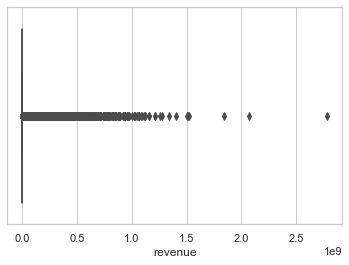

In [79]:
ax = sns.boxplot(x=movies["revenue"])

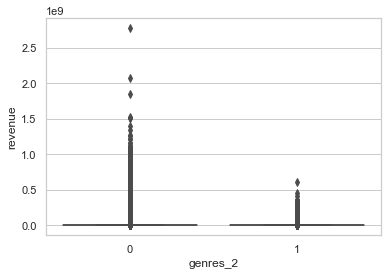

In [80]:
ax = sns.boxplot(x="genres_2", y="revenue", data=movies)

### Popularity

In [81]:
movies['popularity_2'].isna().sum()

11926

Reviso los nulos de 'popularity'

In [82]:
#La columna en cuestion. 
Movies_popu = movies.popularity.str.contains('E-').replace(np.NaN, 0).astype(int).head()

In [83]:
movies['popularityCheck'] = movies.popularity.str.contains('E-').replace(np.NaN, 0).astype(int)

In [84]:
movies['popularityCheck'].value_counts()#HAY 11926 casos con el E-

0    317118
1     11926
Name: popularityCheck, dtype: int64

In [85]:
movies['popularityCheck'].head(32000)

0        0
1        0
2        0
3        0
4        0
        ..
31995    0
31996    0
31997    0
31998    0
31999    0
Name: popularityCheck, Length: 32000, dtype: int32

In [86]:
movies['popularityCheck'] = movies['popularityCheck'] + 1

In [87]:
movies['popularityCheck'] = movies['popularityCheck'].replace(2,0)

In [88]:
movies['popularity'] = movies['popularity'] * movies['popularityCheck']

In [89]:
movies['popularity'] = movies['popularity'].replace('',0)

In [90]:
#movies['popularity'] = pd.to_numeric(movies['popularity'].round(), errors='coerce').astype('Int64')

In [91]:
movies['popularity'] = movies['popularity'].fillna(99999999).astype(np.int64, errors='ignore')
#movies['popularity'] = movies['popularity'].replace(99999999, np.nan)

In [92]:
movies.popularityCheck.count()

329044

In [93]:
movies.popularity.count()

329044

In [94]:
movies['popularity'].isnull().sum()

0

In [95]:
movies['popularity'].isna().sum()

0

In [96]:
#movies['popularity'] = movies['popularity'].fillna(0).astype(np.int64)

In [97]:
#movies['popularity'] = movies['popularity'].astype(float).astype('Int64')

In [98]:
movies['popularityCheck'] = movies['popularityCheck']*movies['popularity']

In [99]:
movies['popularity'] = movies.popularity.str.replace(',','E-')
movies['popularity'] = movies.popularity.str.replace('E-','0')

In [100]:
movies.popularity.count()

315754

Los nulos que son lo 0

### Exploracion

In [101]:
movies.dtypes

ï..id                                   int64
budget                                  int64
genres                                 object
imdb_id                                object
original_language                       int32
original_title                         object
overview                               object
popularity                             object
production_companies                   object
production_countries                   object
release_date                   datetime64[ns]
revenue                               float64
runtime                               float64
spoken_languages                        int32
status                                  int32
tagline                                object
title                                  object
vote_average                          float64
vote_count                              int64
production_companies_number             int64
production_countries_number             int64
spoken_languages_number           

You will get a ValueError if you pass a string representation of a float into int, or a string representation of anything but an integer (including empty string). If you do want to pass a string representation of a float to an int, you can convert to a float first, then to an integer.

Figuran errores muy extraños como '7,00E-06' por lo que va a ser necesaria alguna funcion para poder procesarlos. 

Hay 225 valores con el valor 7,00E-06 en popularity. Los llevare a valor 0.

The following are totally acceptable in python:

passing a string representation of an integer into int
passing a string representation of a float into float
passing a string representation of an integer into float
passing a float into int
passing an integer into float
But you get a ValueError if you pass a string representation of a float into int,

In [102]:
import pandas as pd

In [103]:
movies['popularity_2'] = movies['popularity_2'].replace('NA',0)


In [104]:
movies['popularity_2'] = movies['popularity_2'].replace(np.nan, 0)

In [105]:
#Esto funciona
movies['popularity_2'] = movies['popularity_2'].fillna(0).astype(np.int64, errors='ignore')

In [106]:
movies['popularity_2'] = movies['popularity_2'].astype(int)

In [107]:
movies['popularity_2'].isna().sum()

0

Pequeño vistazo a Original_title y overview

In [108]:
movies[movies.imdb_id == 'tt0094675'][['original_title', 'overview']].iloc[0].to_dict()

{'original_title': 'Ariel',
 'overview': "Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned..."}

# runtime y revenue

Apply per-column the mean of that columns and fill:

In [109]:
movies['runtime'] = movies['runtime'].fillna((movies['runtime'].mean()))

In [110]:
movies['runtime'] = movies['runtime'].astype(int)

No cuento con suficiente memoria RAM como para imputar los outliers

In [111]:
movies['revenue'] = movies['revenue'].fillna((movies['revenue'].mean()))
movies['revenue'] = movies['revenue'].astype(int)

In [112]:
movies['vote_count'] = movies['vote_count'].astype(int)

In [113]:
movies['vote_average'] = movies['vote_average'].astype(int)

# production_countries

In [126]:
movies['production_countries'].value_counts()

none                        151960
United States of America     55504
Germany                      15783
United Kingdom               12254
France                       11401
                             ...  
US Virgin Islands                1
Anguilla                         1
Nauru                            1
Palau                            1
Seychelles                       1
Name: production_countries, Length: 235, dtype: int64

In [127]:
def village(series):
    if series == 'United States of America':
        return 1
    elif series == 'Germany':
        return 1
    elif series == 'United Kingdom':
        return 1
    elif series == 'France':
        return 1
    else:
        return 0

In [128]:
movies['production_countries'] = movies['production_countries'].apply(village)
        
movies['production_countries'].value_counts()

0    234102
1     94942
Name: production_countries, dtype: int64

## Revision Final

In [129]:
int_movies = movies.select_dtypes(include=['int32',]).copy()

1,2,4,11:14,17:22,24:37

In [130]:
movies.dtypes

ï..id                                   int64
budget                                  int64
genres                                 object
imdb_id                                object
original_language                       int32
original_title                         object
overview                               object
popularity                             object
production_companies                   object
production_countries                    int64
release_date                   datetime64[ns]
revenue                                 int32
runtime                                 int32
spoken_languages                        int32
status                                  int32
tagline                                object
title                                  object
vote_average                            int32
vote_count                              int32
production_companies_number             int64
production_countries_number             int64
spoken_languages_number           

In [131]:
movies.isnull().sum()

ï..id                               0
budget                              0
genres                              0
imdb_id                             0
original_language                   0
original_title                      0
overview                            0
popularity                      13290
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                             0
spoken_languages                    0
status                              0
tagline                        276113
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
popularity_2                        0
scientific                          0
release_anio                        0
mes_1.0                             0
mes_2.0     

## Algunos graficos

C:\Users\raul\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:49: RuntimeWarning: overflow encountered in long_scalars
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2.0


array([[<AxesSubplot:xlabel='budget', ylabel='budget'>,
        <AxesSubplot:xlabel='popularity_2', ylabel='budget'>,
        <AxesSubplot:xlabel='revenue', ylabel='budget'>,
        <AxesSubplot:xlabel='genres_2', ylabel='budget'>,
        <AxesSubplot:xlabel='runtime', ylabel='budget'>],
       [<AxesSubplot:xlabel='budget', ylabel='popularity_2'>,
        <AxesSubplot:xlabel='popularity_2', ylabel='popularity_2'>,
        <AxesSubplot:xlabel='revenue', ylabel='popularity_2'>,
        <AxesSubplot:xlabel='genres_2', ylabel='popularity_2'>,
        <AxesSubplot:xlabel='runtime', ylabel='popularity_2'>],
       [<AxesSubplot:xlabel='budget', ylabel='revenue'>,
        <AxesSubplot:xlabel='popularity_2', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='genres_2', ylabel='revenue'>,
        <AxesSubplot:xlabel='runtime', ylabel='revenue'>],
       [<AxesSubplot:xlabel='budget', ylabel='genres_2'>,
        <AxesSubplot:xlabel='popul

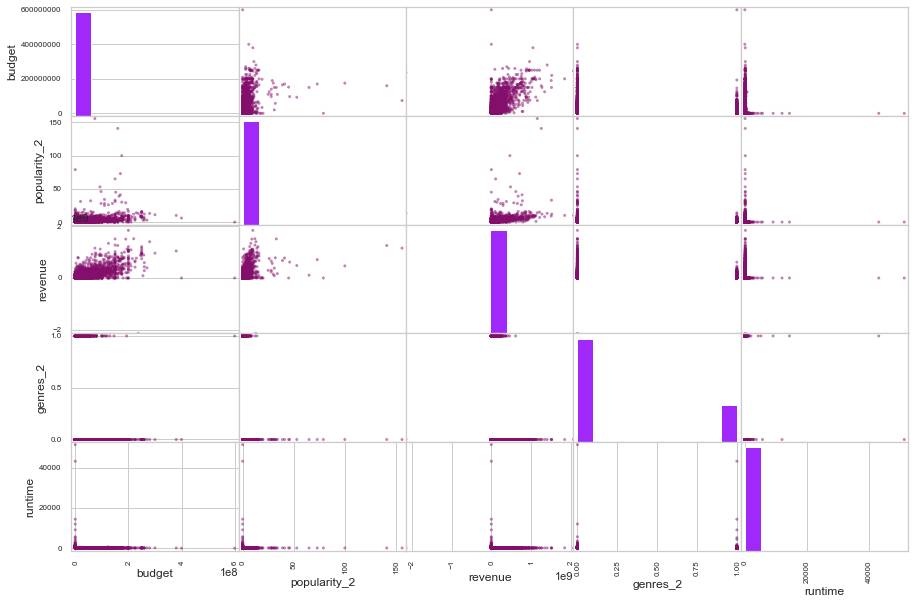

In [117]:
from pandas.plotting import scatter_matrix

attributes = ['budget', 'popularity_2', 'revenue',
              'genres_2' , 'runtime']
scatter_matrix(movies[attributes], figsize=(15, 10), color='#840E6B', hist_kwds={'color':['#A029FA']})

In [118]:
#SIN RAM
# attributes = ['revenue', 'status',
#             'vote_average']#'vote_count'
#scatter_matrix(movies[attributes], figsize=(15, 10), color='#840E6B', hist_kwds={'color':['#A029FA']})

In [119]:
#Sin memoria Ram para ejecutarlo

# import seaborn as sb
# import matplotlib.pyplot as plt
# from matplotlib import style

# style.use('seaborn-whitegrid')
# plt.rcParams['figure.figsize'] = (20,10)

In [120]:
#Sin memoria Ram para ejecutarlo

#sb.pairplot(movies)
#plt.savefig('pairplor.png')

In [121]:
#Sin memoria Ram para ejecutarlo

#plt.scatter(x = 'revenue', y = 'budget', data = movies, s = 100, alpha = 0.3, edgecolor = 'white')
#plt.title('Engine size vs C02 Emissions', fontsize = 16)
#plt.ylabel('budget', fontsize = 12)
#plt.xlabel('revenue', fontsize = 12)

#plt.savefig('enginesize_co2.png')

## Modelado

Variable de estudio (dependiente): revenue. Las ganancias de una pelicula. 

Dejemos el dataset unicamente con las variables que tienen 'relevancia' de estudio.

In [134]:
movies_almodelado = movies[['budget','original_language','revenue','runtime','spoken_languages','status','vote_average','vote_count','popularity_2','production_countries','release_anio','mes_1.0','mes_2.0','mes_3.0','mes_4.0','mes_5.0','mes_6.0','mes_7.0','mes_8.0','mes_9.0','mes_10.0','mes_11.0','mes_12.0','genres_2']]

In [136]:
movies_almodelado.to_csv(r'C:\Users\raul\Documents\Data Science Proyectos\Datos\datoslimpios.csv', index = False)

Con este data set 'limpo' reailzo el modelado en googlecolab. 